**Student Name**: Thirumala Venkat Chanda

**Student ID**: 23099003

<ipython-input-8-01c772c85e20>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


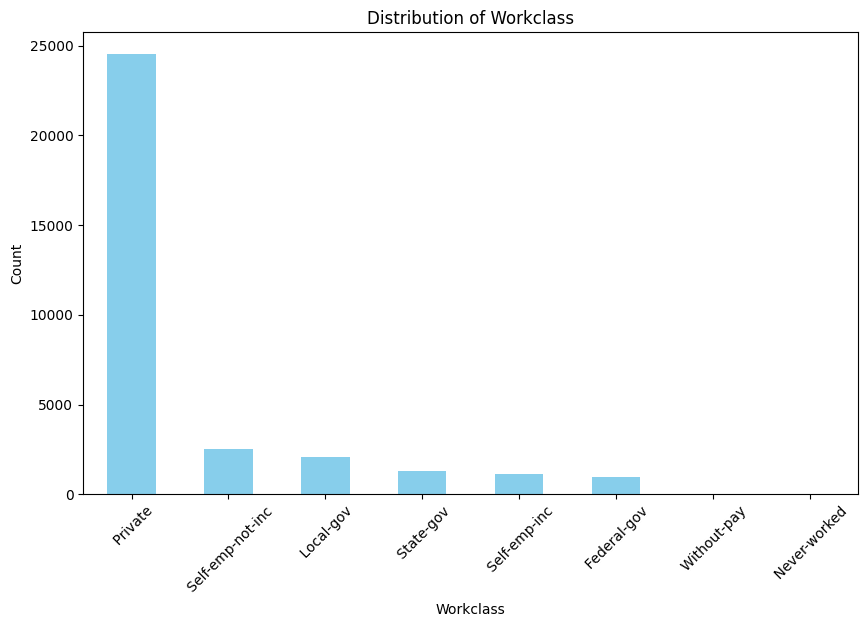

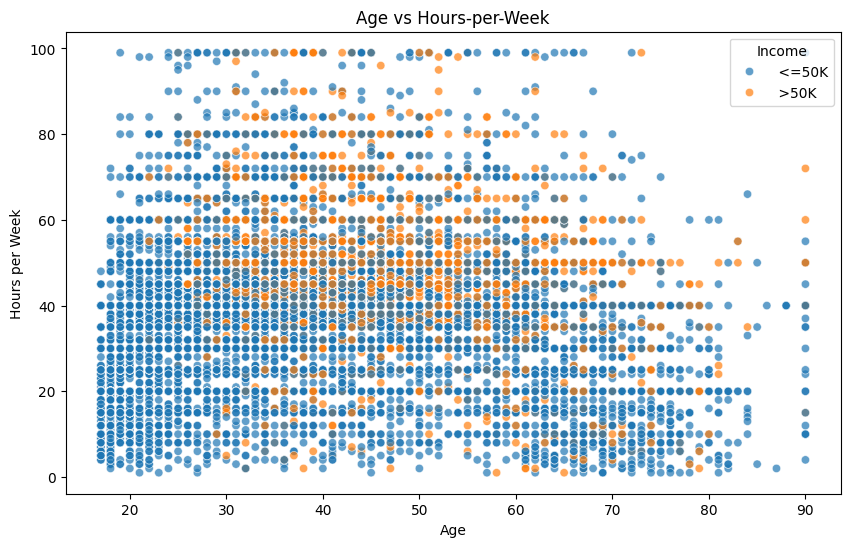

<ipython-input-8-01c772c85e20>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='income', y='hours-per-week', palette='muted')


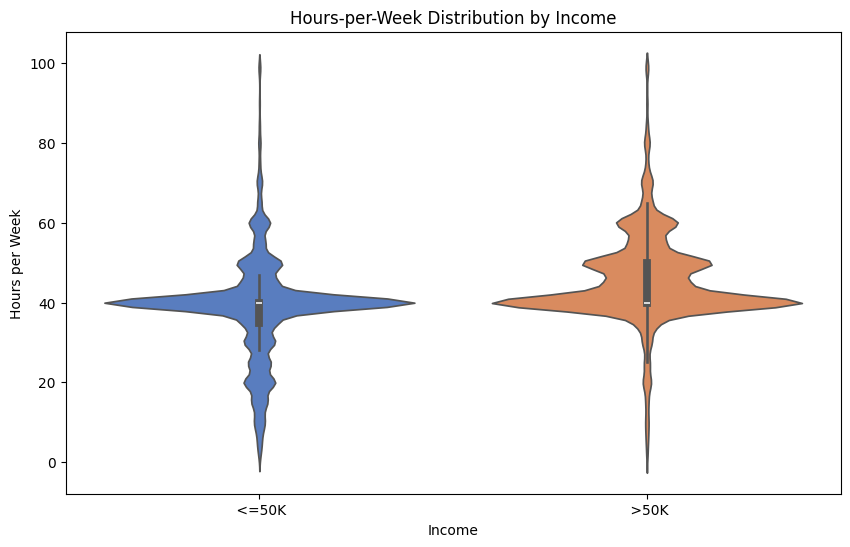

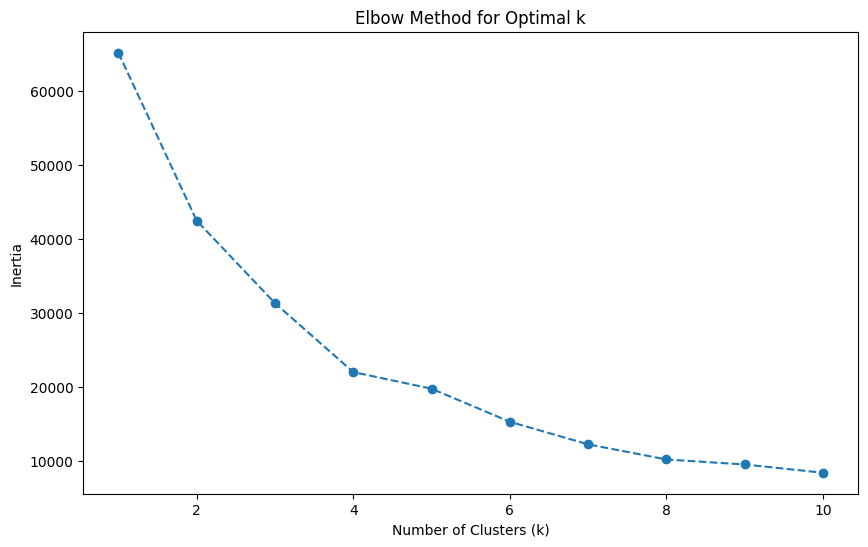

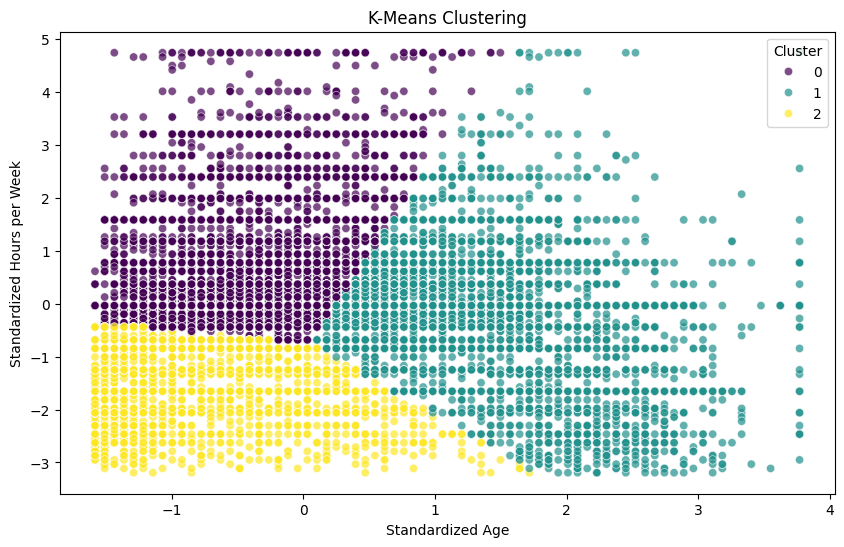

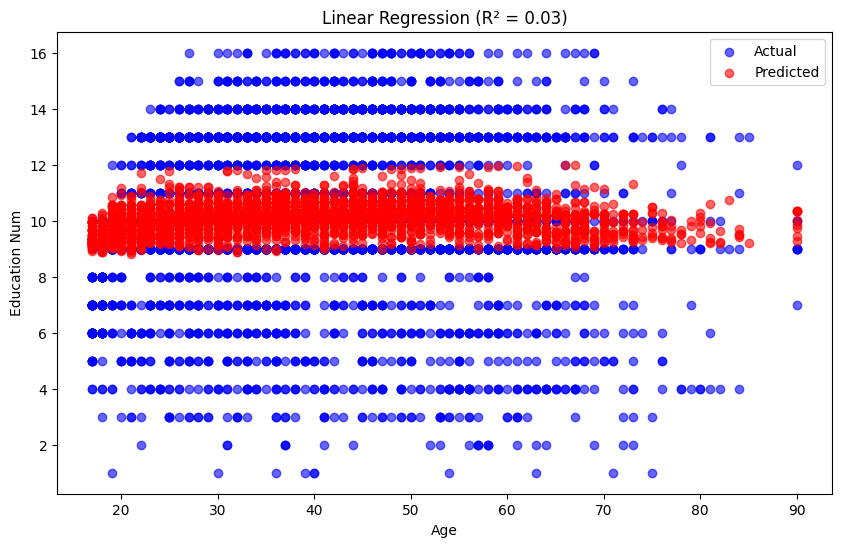

R² Score: 0.03
Future Predictions:
   age  hours-per-week  Predicted Cluster  Predicted Education-Num
0   25              20                  2                 9.399166
1   40              45                  0                10.225930
2   60              60                  1                10.780264


In [8]:
import pandas as pd
import zipfile
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

def extract_data(zip_file_path, extracted_folder):
    """
    Extracts a zip file containing the dataset.
    Args:
        zip_file_path (str): Path to the zip file.
        extracted_folder (str): Folder to extract the contents.
    Returns:
        str: Path to the extracted data file.
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)
    return os.path.join(extracted_folder, 'adult.data')

def load_and_clean_data(data_file_path):
    """
    Loads and cleans the dataset.
    Args:
        data_file_path (str): Path to the dataset file.
    Returns:
        pd.DataFrame: Cleaned dataset.
    """
    columns = [
        "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"
    ]
    data = pd.read_csv(data_file_path, header=None, names=columns, na_values=[" ?"])
    for column in ['workclass', 'occupation', 'native-country']:
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)
    return data

def visualize_data(data):
    """
    Creates required visualizations: bar chart, scatter plot, and violin plot.
    Args:
        data (pd.DataFrame): The dataset.
    """
    # Bar chart for 'workclass'
    plt.figure(figsize=(10, 6))
    data['workclass'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Workclass')
    plt.xlabel('Workclass')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Scatter plot for 'age' vs 'hours-per-week'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income', alpha=0.7)
    plt.title('Age vs Hours-per-Week')
    plt.xlabel('Age')
    plt.ylabel('Hours per Week')
    plt.legend(title='Income')
    plt.show()

    # Violin plot for 'hours-per-week' grouped by 'income'
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='income', y='hours-per-week', palette='muted')
    plt.title('Hours-per-Week Distribution by Income')
    plt.xlabel('Income')
    plt.ylabel('Hours per Week')
    plt.show()

def perform_clustering(data):
    """
    Performs K-means clustering and visualizes the clusters.
    Args:
        data (pd.DataFrame): The dataset.
    Returns:
        KMeans: Trained KMeans model.
        StandardScaler: Fitted scaler for standardization.
    """
    scaler = StandardScaler()
    X = scaler.fit_transform(data[['age', 'hours-per-week']])

    # Elbow method to determine optimal clusters
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

    # Perform KMeans with optimal clusters
    optimal_k = 3  # Chosen based on elbow method
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)

    # Cluster visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.7)
    plt.title('K-Means Clustering')
    plt.xlabel('Standardized Age')
    plt.ylabel('Standardized Hours per Week')
    plt.legend(title='Cluster')
    plt.show()

    return kmeans, scaler

def perform_regression(data):
    """
    Performs linear regression and visualizes predictions.
    Args:
        data (pd.DataFrame): The dataset.
    Returns:
        LinearRegression: Trained linear regression model.
    """
    X = data[['age', 'hours-per-week']]
    y = data['education-num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Regression plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['age'], y_test, color='blue', alpha=0.6, label='Actual')
    plt.scatter(X_test['age'], y_pred, color='red', alpha=0.6, label='Predicted')
    plt.title(f'Linear Regression (R² = {r2:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Education Num')
    plt.legend()
    plt.show()

    print(f"R² Score: {r2:.2f}")
    return model

def future_predictions(new_data, scaler, kmeans, model):
    """
    Predicts clusters and regression targets for new data points.
    Args:
        new_data (pd.DataFrame): New data points for prediction.
        scaler (StandardScaler): Fitted scaler.
        kmeans (KMeans): Trained KMeans model.
        model (LinearRegression): Trained regression model.
    """
    new_data_scaled = scaler.transform(new_data)
    new_data['Predicted Cluster'] = kmeans.predict(new_data_scaled)
    new_data['Predicted Education-Num'] = model.predict(new_data[['age', 'hours-per-week']])
    print("Future Predictions:")
    print(new_data)

# Main Workflow
zip_file_path = 'adult.zip'
extracted_folder = 'extracted_data'

# Extract and clean data
data_file_path = extract_data(zip_file_path, extracted_folder)
data = load_and_clean_data(data_file_path)

# Visualize data
visualize_data(data)

# Perform clustering
kmeans, scaler = perform_clustering(data)

# Perform regression
model = perform_regression(data)

# Future predictions
new_data = pd.DataFrame({
    'age': [25, 40, 60],
    'hours-per-week': [20, 45, 60]
})
future_predictions(new_data, scaler, kmeans, model)
